# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Find the top 5 attributes that drives the price of used cars.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector

In [8]:
df = pd.read_csv('data/vehicles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [9]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [10]:
df.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [11]:
df[df['price'] <1000 ].count()

id              46315
region          46315
price           46315
year            46275
manufacturer    43831
model           45519
condition       15660
cylinders       23939
fuel            45894
odometer        43994
title_status    44632
transmission    45576
VIN             31540
drive           31027
size            13141
type            34703
paint_color     24979
state           46315
dtype: int64

In [12]:
df['size'].value_counts()

size
full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: count, dtype: int64

In [13]:
df[df['type'] == 'sedan']['size'].isna().sum()

52622

In [14]:
df['paint_color'].value_counts()

paint_color
white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: count, dtype: int64

In [15]:
df['type'].value_counts()

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

In [16]:
df['title_status'].value_counts()

title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

In [17]:
df['condition'].value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [18]:
df['cylinders'].value_counts()

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64

In [19]:
df['drive'].value_counts()

drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64

In [20]:
df.query('odometer > 60000 and odometer < 100000')['condition'].isna().sum()

41017

In [21]:
df[(df['odometer'] < 100)]['condition'].value_counts()

condition
excellent    1350
good          634
new           386
like new      232
fair           95
salvage        14
Name: count, dtype: int64

In [22]:
df[(df['odometer'] > 30000)&(df['odometer'] < 60000)]['condition'].value_counts()

condition
good         23739
excellent    12946
like new      3924
fair           203
new            130
salvage         45
Name: count, dtype: int64

In [23]:
df['region'].value_counts()

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64

In [24]:
df['manufacturer'].value_counts()

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin

In [25]:
df['state'].value_counts()

state
ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
wi    11398
co    11088
tn    11066
va    10732
il    10387
nj     9742
id     8961
az     8679
ia     8632
ma     8174
mn     7716
ga     7003
ok     6792
sc     6327
mt     6294
ks     6209
in     5704
ct     5188
al     4955
md     4778
nm     4425
mo     4293
ky     4149
ar     4038
ak     3474
la     3196
nv     3194
nh     2981
dc     2970
me     2966
hi     2964
vt     2513
ri     2320
sd     1302
ut     1150
wv     1052
ne     1036
ms     1016
de      949
wy      610
nd      410
Name: count, dtype: int64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Lets remove the outliers from the dataset

In [28]:
df_car = df[df['price'] > 5000]
Q1 = df_car['price'].quantile(0.25)
Q3 = df_car['price'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
df_car = df_car[~((df_car['price'] < (Q1 - threshold * IQR)) | (df_car['price'] > (Q3 + threshold * IQR)))]

<Axes: >

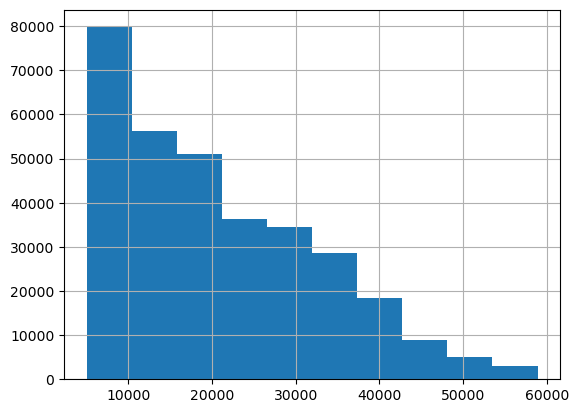

In [29]:
df_car['price'].hist()

Some of the columns like id or VIN does not add any value to the selection. So dropping those.

In [31]:
df_car = df_car.drop(['id', 'VIN', 'state'], axis=1)

A closer look at size and type shows that they contains almost similar information. But size field has lot of NaNs. So dropping that column.

In [33]:
df_car = df_car.drop('size', axis=1)

title_status most contains the value 'clean'. Assuming that clean titles are preferred, dropping the other title status

In [35]:
df_car = df_car[df_car['title_status'] == 'clean'].drop('title_status', axis=1)

Too many variations of model and region column. Removing them from the dataset

In [37]:
df_car = df_car.drop(['model', 'region'], axis=1)

For cylinders, there are few NaN values. Since there exists a value called 'others', assinging that to all the NaN values.

In [39]:
df_car['cylinders'] = df_car['cylinders'].fillna('other')

A significant portion for the column 'condition' contains NaN. This seems like an important column. Normally odometer is a good indication of car condition. Low milage cars are normally like new cars. With that assumption transforming the NaN values for 'condition' as follows using the values of odometer:<br>
less than 100 : excellent<br>
between 100 - 10K : new<br>
between 10k-30K: Like new<br>
between 30K-60K: Good<br>
greater than 60K: Fair<br>

In [41]:
df_car.loc[(df_car['odometer'] < 100) & (df_car['condition'].isna()), 'condition'] = 'excellent'
df_car.loc[(df_car['odometer'] > 100) & (df_car['odometer'] < 10000) & (df_car['condition'].isna()), 'condition'] = 'new'
df_car.loc[(df_car['odometer'] > 10000) & (df_car['odometer'] < 30000) & (df_car['condition'].isna()), 'condition'] = 'like new'
df_car.loc[(df_car['odometer'] > 30000) & (df_car['odometer'] < 60000) & (df_car['condition'].isna()), 'condition'] = 'good'
df_car.loc[(df_car['odometer'] > 60000) & (df_car['condition'].isna()), 'condition'] = 'fair'

In [42]:
df_car = df_car.dropna()

In [43]:
df_car.head(5)

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
31,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,automatic,rwd,truck,black
32,27990,2012.0,gmc,good,8 cylinders,gas,68696.0,other,4wd,pickup,black
33,34590,2016.0,chevrolet,good,6 cylinders,gas,29499.0,other,4wd,pickup,silver
34,35000,2019.0,toyota,excellent,6 cylinders,gas,43000.0,automatic,4wd,truck,grey
35,29990,2016.0,chevrolet,good,6 cylinders,gas,17302.0,other,4wd,pickup,red


In [44]:
df_car.isna().any()

price           False
year            False
manufacturer    False
condition       False
cylinders       False
fuel            False
odometer        False
transmission    False
drive           False
type            False
paint_color     False
dtype: bool

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [46]:
mses = {}

#### LinearRegression

In [48]:
X = df_car.drop('price', axis=1)
y = df_car['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [49]:
col_transformer = make_column_transformer(
    (OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False), ['manufacturer', 'fuel', 'transmission', 'drive', 'type', 'paint_color']),
    (OrdinalEncoder(categories=[['excellent', 'new', 'like new', 'good', 'fair', 'salvage']]), ['condition']),
    (OrdinalEncoder(categories=[['12 cylinders', '10 cylinders','8 cylinders', '6 cylinders', '5 cylinders', '4 cylinders', '3 cylinders', 'other']]), ['cylinders']),
    remainder = 'passthrough'
)

In [50]:
pipe_standard = Pipeline([
    ('col_transformer', col_transformer),
    ('scalar', StandardScaler()),    
    ('model', LinearRegression())
])
pipe_standard

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['manufacturer', 'fuel',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('ordinalencoder-1',
                                                  OrdinalEncoder(categories=[['excellent',
                                                                              'new',
                                                                              'like '
                                                                              'new',
                                                                              'good',
                                                                              'fair',
                                                                              'salvage']]),
                                                  ['condition']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['12 '
                                                                              'cylinders',
                                                                              '10 '
                                                                              'cylinders',
                                                                              '8 '
                                                                              'cylinders',
                                                                              '6 '
                                                                              'cylinders',
                                                                              '5 '
                                                                              'cylinders',
                                                                              '4 '
                                                                              'cylinders',
                                                                              '3 '
                                                                              'cylinders',
                                                                              'other']]),
                                                  ['cylinders'])])),
                ('scalar', StandardScaler()), ('model', LinearRegression())])

In [51]:
pipe_standard.fit(X_train, y_train)
importance_standard = permutation_importance(pipe_standard, X_test, y_test, n_repeats = 10, random_state=12)['importances_std']

In [52]:
for i, col in enumerate(X_train.columns):
    print(f'{col}: {importance_standard[i]}')
mses['Linear regression'] = mean_squared_error(pipe_standard.predict(X_test), y_test)

year: 0.0028618948138085377
manufacturer: 0.0009851424157465674
condition: 0.00025012165511812654
cylinders: 6.264867125299479e-05
fuel: 0.001052698906112322
odometer: 0.0006479642670758157
transmission: 0.0008851832002225592
drive: 0.0016405267525538743
type: 0.0017533630849493609
paint_color: 0.0003536431249248799


#### LinearRegression with polynomial degree 2

In [54]:
pipe_standard_degree2 = Pipeline([
    ('col_transformer', col_transformer),
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])
pipe_standard_degree2

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['manufacturer', 'fuel',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('ordinalencoder-1',
                                                  OrdinalEncoder(categories=[['excellent',
                                                                              'new',
                                                                              'like '
                                                                              'new',
                                                                              'good',
                                                                              'fair',
                                                                              'salvage']]),
                                                  ['condition']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['12 '
                                                                              'cylinders',
                                                                              '10 '
                                                                              'cylinders',
                                                                              '8 '
                                                                              'cylinders',
                                                                              '6 '
                                                                              'cylinders',
                                                                              '5 '
                                                                              'cylinders',
                                                                              '4 '
                                                                              'cylinders',
                                                                              '3 '
                                                                              'cylinders',
                                                                              'other']]),
                                                  ['cylinders'])])),
                ('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', LinearRegression())])

In [55]:
pipe_standard_degree2.fit(X_train, y_train)
importance_standard_degree2 = permutation_importance(pipe_standard, X_test, y_test, n_repeats = 10, random_state=12)['importances_std']

In [56]:
for i, col in enumerate(X_train.columns):
    print(f'{col}: {importance_standard_degree2[i]}')
mses['Linear regression Degree 2'] = mean_squared_error(pipe_standard_degree2.predict(X_test), y_test)

year: 0.0028618948138085377
manufacturer: 0.0009851424157465674
condition: 0.00025012165511812654
cylinders: 6.264867125299479e-05
fuel: 0.001052698906112322
odometer: 0.0006479642670758157
transmission: 0.0008851832002225592
drive: 0.0016405267525538743
type: 0.0017533630849493609
paint_color: 0.0003536431249248799


#### Ridge

In [58]:
pipe_ridge = Pipeline([
    ('col_transformer', col_transformer),
    ('scalar', StandardScaler()),
    ('model', Ridge())
])
pipe_ridge

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['manufacturer', 'fuel',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('ordinalencoder-1',
                                                  OrdinalEncoder(categories=[['excellent',
                                                                              'new',
                                                                              'like '
                                                                              'new',
                                                                              'good',
                                                                              'fair',
                                                                              'salvage']]),
                                                  ['condition']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['12 '
                                                                              'cylinders',
                                                                              '10 '
                                                                              'cylinders',
                                                                              '8 '
                                                                              'cylinders',
                                                                              '6 '
                                                                              'cylinders',
                                                                              '5 '
                                                                              'cylinders',
                                                                              '4 '
                                                                              'cylinders',
                                                                              '3 '
                                                                              'cylinders',
                                                                              'other']]),
                                                  ['cylinders'])])),
                ('scalar', StandardScaler()), ('model', Ridge())])

In [59]:
alphas = np.logspace(0, 10, 50)
param_dict = {'model__alpha': alphas}

In [60]:
model_ridge = GridSearchCV(pipe_ridge, param_grid=param_dict, cv=5, scoring='neg_mean_squared_error')
model_ridge.fit(X, y)
model_ridge.best_estimator_

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['manufacturer', 'fuel',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('ordinalencoder-1',
                                                  OrdinalEncoder(categories=[['excellent',
                                                                              'new',
                                                                              'like '
                                                                              'new',
                                                                              'good',
                                                                              'fair',
                                                                              'salvage']]),
                                                  ['condition']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['12 '
                                                                              'cylinders',
                                                                              '10 '
                                                                              'cylinders',
                                                                              '8 '
                                                                              'cylinders',
                                                                              '6 '
                                                                              'cylinders',
                                                                              '5 '
                                                                              'cylinders',
                                                                              '4 '
                                                                              'cylinders',
                                                                              '3 '
                                                                              'cylinders',
                                                                              'other']]),
                                                  ['cylinders'])])),
                ('scalar', StandardScaler()),
                ('model', Ridge(alpha=1151.3953993264481))])

In [61]:

mses['Ridge'] = mean_squared_error(model_ridge.best_estimator_.predict(X_test), y_test)

In [62]:
mses

{'Linear regression': 66670195.21115557,
 'Linear regression Degree 2': 2.46156416169385e+21,
 'Ridge': 65367271.476047434}

#### Ridge with Polynomial degree 2

In [64]:
pipe_ridge_degree2 = Pipeline([
    ('col_transformer', col_transformer),
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge())
])
pipe_ridge_degree2

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['manufacturer', 'fuel',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('ordinalencoder-1',
                                                  OrdinalEncoder(categories=[['excellent',
                                                                              'new',
                                                                              'like '
                                                                              'new',
                                                                              'good',
                                                                              'fair',
                                                                              'salvage']]),
                                                  ['condition']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['12 '
                                                                              'cylinders',
                                                                              '10 '
                                                                              'cylinders',
                                                                              '8 '
                                                                              'cylinders',
                                                                              '6 '
                                                                              'cylinders',
                                                                              '5 '
                                                                              'cylinders',
                                                                              '4 '
                                                                              'cylinders',
                                                                              '3 '
                                                                              'cylinders',
                                                                              'other']]),
                                                  ['cylinders'])])),
                ('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge())])

In [ ]:
model_ridge_degree2 = GridSearchCV(pipe_ridge_degree2, param_grid=param_dict, cv=5, scoring='neg_mean_squared_error')
model_ridge_degree2.fit(X, y)
model_ridge_degree2.best_estimator_

In [ ]:
mses['Ridge Degree 2'] =mean_squared_error(model_ridge_degree2.best_estimator_.predict(X_test), y_test)

In [ ]:
ridge_degree2_dict = {}
importance_ridge_degree2 = permutation_importance(model_ridge_degree2, X_test, y_test, n_repeats = 10, random_state=12)['importances_std']
for i, col in enumerate(X_train.columns):
    print(f'{col}: {importance_ridge_degree2[i]}')
    ridge_degree2_dict[col] = importance_ridge_degree2[i]

#### Feature selection using Lasso

In [ ]:
pipe_lasso = Pipeline([
    ('col_transformer', col_transformer),
    ('scalar', StandardScaler()),
    ('column_selector',SequentialFeatureSelector(estimator=Lasso(random_state = 42), n_features_to_select=4)),
    ('model', Lasso(random_state = 42))
])
pipe_lasso

In [ ]:
pipe_lasso.fit(X_train, y_train)

In [ ]:
mses['Lasso'] = mean_squared_error(pipe_lasso.predict(X_test), y_test)
original_features = pipe_lasso.named_steps['col_transformer'].get_feature_names_out()
selected_feature_indices = pipe_lasso.named_steps['column_selector'].get_support(indices=True)
selected_features = [original_features[i] for i in selected_feature_indices]
selected_features

In [ ]:
mses

#### Feature selection using Lasso with polynomial

In [ ]:
pipe_lasso_degree2 = Pipeline([
    ('col_transformer', col_transformer),
    ('poly', PolynomialFeatures(degree=2)),
    ('scalar', StandardScaler()),
    ('column_selector',SequentialFeatureSelector(estimator=Lasso(random_state = 42), n_features_to_select=4)),
    ('model', Lasso(random_state = 42))
])
pipe_lasso_degree2

In [ ]:
pipe_lasso_degree2.fit(X_train, y_train)

In [ ]:
mses['Lasso with degree 2'] = mean_squared_error(pipe_lasso_degree2.predict(X_test), y_test)

In [ ]:
#selected_features_degree2 = [original_features_degree2[i] for i in selected_feature_indices_degree2]
#selected_features_degree2
column_transformer_feature_names = pipe_lasso_degree2.named_steps['col_transformer'].get_feature_names_out()
poly_feature_names = pipe_lasso_degree2.named_steps['poly'].get_feature_names_out(column_transformer_feature_names)
poly_featuselector = pipe_lasso_degree2.named_steps['column_selector']
selector = pipe_lasso_degree2.named_steps['column_selector']
selected_feature_indices = selector.get_support(indices=True)
final_feature_names = poly_feature_names[selected_feature_indices]
print(final_feature_names)

In [ ]:
mses

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
plt.bar(list(mses.keys()), list(mses.values()))
plt.ylim(0, 100000000)
plt.xticks(rotation=90)

It is clear that Ridge model with polynomial degree 2 has the best performance. Lets find out the top 5 attributes obtained from permutation_importance for this mode 

In [ ]:
ridge_degree2_dict
sorted_dict = dict(sorted(ridge_degree2_dict.items(), key=lambda item: item[1], reverse = True))
plt.bar(list(sorted_dict.keys()), list(sorted_dict.values()))
plt.xticks(rotation=90)
plt.show()
#importance_ridge_degree2

In [ ]:
plt.scatter(X['odometer'], y)

In [ ]:
type = pd.DataFrame(df_car.groupby(by='type')['price'].mean()).reset_index().sort_values(by='price', ascending=False)
plt.bar(type['type'], type['price'])
plt.xticks(rotation=60)

In [ ]:
color = pd.DataFrame(df_car.groupby(by='paint_color')['price'].mean()).reset_index().sort_values(by='price', ascending=False)
color

In [ ]:
plt.bar(color['paint_color'], color['price'])
plt.xticks(rotation=60)
plt.show()

In [ ]:
manufacturer = pd.DataFrame(df_car.groupby(by='manufacturer')['price'].mean()).reset_index().sort_values(by='price', ascending=False)
plt.figure(figsize=(16,4))
plt.bar(manufacturer['manufacturer'], manufacturer['price'])
plt.xticks(rotation=90)
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

We evaluated different attributes of the car to find out what factors might be influencing the price. 
From our findings, here are list of top 5 attributes that affects the price of a used car:<BR>
Odometer: Lower the odometer reading, higher the price<BR>
year: Newer the car, higher the price<BR>
type: pickup, coup are popular type of cars that drives the price<BR>
paint_color: White, black, yellow are top 3 colors that drives the price.<BR>
manufaturer: Car price depends on the manufacture. e.g., fearraru, aston-martin, tesla, morgan have high resell value
    